In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

#########################################################
#
# makeData is a small function that makes a list of 
# x and y data points that, when plotted sequentually, will draw a 
# n-point star
#
# n = number of points in the star
# s = the number of points 'skipped' between each line
# startingPoint = the starting angle in rad (I think)
# returnes an array of [[x data],[y data]]
#
############################################################

def makeData (n, s, startingPoint):
    x = []
    y = []
    i = 0
    while i < n + 1:
        x.append( np.cos(startingPoint + np.pi/2 + 2*np.pi*s*i/n) )
        y.append( np.sin(startingPoint + np.pi/2 + 2*np.pi*s*i/n) )
        i+=1
    return [x,y]

#############################################################
#
# drawStar draws a star, (or in some cases multiple sub-stars)
#
# n = the number of points of the star
# s = the number of points skipped when selecting each lines end point
#
# note: if n and s have common denominators, multimple substars 
#       are required to reach the desired number of points, and are
#       drawn (in different colors)
#
#################################################################

def drawStar(n,s):
    numberOfSubStars = gcd(n,s)
    j = 0
    fig, ax = plt.subplots()
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.axis('off')
    while j < numberOfSubStars:
        tempData = makeData(n,s,2*np.pi*j/n)
        ax.plot(tempData[0],tempData[1])
        j+=1
    
#######################################################################
#
# drawRandStar draws a random star 
#
# number of points is between 2 and 25
#
#######################################################################

def drawRandStar():
    n = np.random.randint(3,25)
    s = np.random.randint(1,n-1)
    
    numberOfSubStars = gcd(n,s)
    j = 0
    fig, ax = plt.subplots()
    ax.set_xlim((-1,1))
    ax.set_ylim((-1,1))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.axis('off')
    while j < numberOfSubStars:
        tempData = makeData(n,s,2*np.pi*j/n)
        ax.plot(tempData[0],tempData[1])
        j+=1
        
##########################################################################
#
# makePStarData makes data for drawing a pseudo star
# drawPStar draws a psuedo star
#
# So... whats a psuedo star?  Here I am defining a star as a shape created
# by connecting n evenly spaced points laying on a circle with straight lines
# connecting them.  You can also think of a star being drawn by the path 
# followed.  So after every straight line segment, we rotate our path by a
# angle twoards the center of the circle, and travel the same distance again.
#
# Now with that out of the way, when I create here are pseudo stars, where the line 
# segments are not of equal length, they instead alternate.
#
# There are many other ways to alter the preceedure of drawing a star to create a pseudo star,
# but this type looks quite cool... so lets make some.
#
# n = the number of points in the central star.  
#     It determins the type of rotational symmety, but not the number of points.
#
# R = the ratio of the size of the central star to the size of the outside additional
#     shapes
#
# Note:  For these images, s is default to floor(n/2), this could be expanded in the future.
#
##########################################################################


def makePStarData(n,R,startingPoint):
    ratio = 3*R/(2+R)
    xData = []
    yData = []
    lastPhi = 0
    xData.append( 3*np.cos(startingPoint) )
    yData.append( ratio*(np.tan(np.pi/(2*n)) + np.sin(startingPoint)) )
    i = 1
    while i < n*2+1:
        lastPhi+= np.pi - np.pi/n
        if i % 2 != 0:
            xData.append(xData[i-1] + 2*(3-ratio*np.tan(np.pi/n)*np.tan(np.pi/(2*n)))*np.cos(np.pi/n)*np.cos(lastPhi))
            yData.append(yData[i-1] + 2*(3-ratio*np.tan(np.pi/n)*np.tan(np.pi/(2*n)))*np.cos(np.pi/n)*np.sin(lastPhi))
        else:
            xData.append(xData[i-1] + 6*np.cos(lastPhi))
            yData.append(yData[i-1] + 6*np.sin(lastPhi))
        i+=1
    return [xData,yData]
                 
def drawPStar(n,R):
                 
    fig, ax = plt.subplots()
    axisLim = 6*np.sin(np.pi/(2*n))/np.sin(np.pi/n)
    ax.set_xlim((-axisLim,axisLim))  
    ax.set_ylim((-axisLim,axisLim))
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.axis('off')
    
    data = makePStarData(n,R,0)
    ax.plot(data[0],data[1])




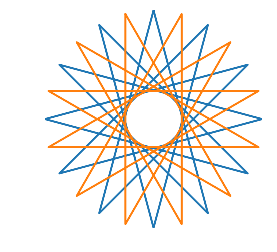

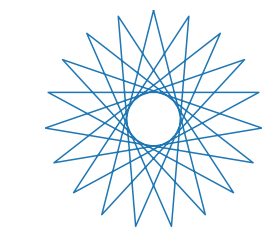

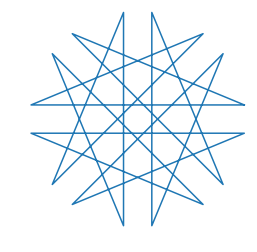

In [3]:
drawStar(24,10)  #  <-- this one is my favorite
drawRandStar()
drawPStar(8,4)

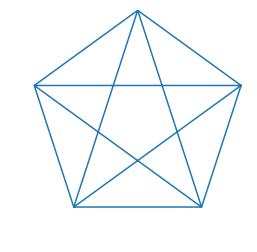

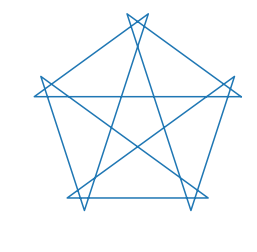

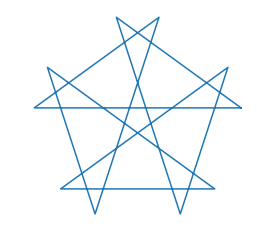

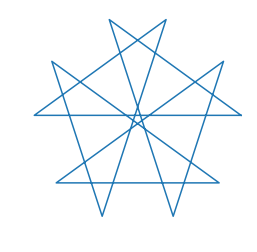

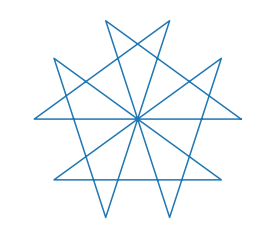

In [4]:
#This shows how changing values of R change the resulting shape, R is a positive integer.
drawPStar(5,10000000)
drawPStar(5,4)
drawPStar(5,1)
drawPStar(5,0.25)
drawPStar(5,0)

In [5]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML

fig, ax = plt.subplots()
#xdata, ydata = [], []



def update(frame, a0, label_text):
    del ax.lines[1:] #clear any line data left over from last update.  I think this is probably bad coding, but i couldnt find another way to get multiple 2dline objects into animation frames
    
    nRand = np.random.randint(3,25)
    sRand = np.random.randint(1,nRand-1)
    numberOfSubStars = gcd(nRand,sRand)
    j = 0
    while j < numberOfSubStars:
        tempData = makeData(nRand,sRand,2*np.pi*j/nRand)
        if j == 0:
            a0.set_data(tempData[0], tempData[1])
        else:
            ax.plot(tempData[0], tempData[1])
        j+=1
    label_text.set_text('n = %i \ns = %i' % (nRand, sRand))

axisLim = 1           
ax = plt.axes(xlim=(-axisLim, axisLim), ylim=(-axisLim, axisLim))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.axis('off')
a0, = ax.plot([], [])
label_text = ax.text(0.0, 0.9, '', transform=ax.transAxes)


ani = animation.FuncAnimation(fig, update, fargs=(a0, label_text), frames=100, interval=1000)
plt.close(fig)

HTML(ani.to_html5_video())


In [6]:
import matplotlib.animation as animation
from matplotlib import rc
from IPython.display import HTML


n=5
count = 0
def update(frameNum, a0):
    R = np.tan(np.pi/4*(np.sin(np.pi*frameNum/180)+1))
    tempData = makePStarData(n,R,0)
    x = tempData[0]
    y = tempData[1]
    a0.set_data(x,y)
    

axisLim = 6*np.sin(np.pi/(2*n))/np.sin(np.pi/n)            
fig = plt.figure()
ax = plt.axes(xlim=(-axisLim, axisLim), ylim=(-axisLim, axisLim))
x0,x1 = ax.get_xlim()
y0,y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))
ax.axis('off')
a0, = ax.plot([], [])

anim = animation.FuncAnimation(fig, update, 
                               fargs=(a0,), frames = 360,
                               interval=20)
plt.close(fig)
# show plot
#plt.show()

HTML(anim.to_html5_video())